# Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load Data

In [2]:
file = "Data/insurance - insurance (1).csv"

df = pd.read_csv(file)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Hypothesis Test 1

Do smokers have higher insurance charges than non-smokers?

**State Hypotheses:**
- Null Hypothesis: There is no difference in charges between smokers and non-smokers.
- Alternate Hypothesis: Charges are higher for smokers than non-smokers.
- Alpha = 0.05

**Test Type:**
  A 2-sample T-test is best for this scenario because we are comparing two different groups (smokers and non-smokers).

**Test Assumptions:**
  - No significant outliers
  - Normality
  - Equal variance

In [3]:
# Create sample
# sample = df.sample(n=50, random_state=42)
smoker_charges = df.loc[df['smoker'] == 'yes', "charges"]
non_smoker_charges = df.loc[df['smoker'] == 'no', "charges"]

# Get means for smoking and charges
print(f"Smokers (n = {len(smoker_charges)}) | Mean = {np.mean(smoker_charges):.2f}")
print(f"Non-Smokers (n = {len(non_smoker_charges)}) | Mean = {np.mean(non_smoker_charges):.2f}")

For Smokers (n = 274) | Mean = 32050.23
For Non-Smokers (n = 1064) | Mean = 8434.27


In [4]:
# Check for outliers in smokers
zscores_smoker = stats.zscore(smoker_charges)
outliers_smoker = abs(zscores_smoker)>3
np.sum(outliers_smoker)

0

In [5]:
# Check for outliers in non-smokers
zscores_non_smoker = stats.zscore(non_smoker_charges)
outliers_non_smoker = abs(zscores_non_smoker)>3
np.sum(outliers_non_smoker)

24

In [6]:
# Perform normality tests for each group
result_smoker = stats.normaltest(smoker_charges)
result_non_smoker = stats.normaltest(non_smoker_charges)

# Print results
print("Normality Test Results for smokers:")
print("Statistic:", result_smoker.statistic)
print("P-value:", result_smoker.pvalue)

print("\nNormality Test Results for non-smokers:")
print("Statistic:", result_non_smoker.statistic)
print("P-value:", result_non_smoker.pvalue)

Normality Test Results for smokers:
Statistic: 61.03941356533816
P-value: 5.564930630036463e-14

Normality Test Results for non-smokers:
Statistic: 316.4528082392722
P-value: 1.9193129759002216e-69


Both sets are not normally distributed.

### Levene's Test

In [7]:
# Test for equal variance
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

The p-value is less 0.05, so we should consider rejecting the null hyothesis. The variances are not equal.

In [8]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
result

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)

### Analysis

The p-value is less than 0.05, so there is not a significant difference of charges between smokers and non-smokers.

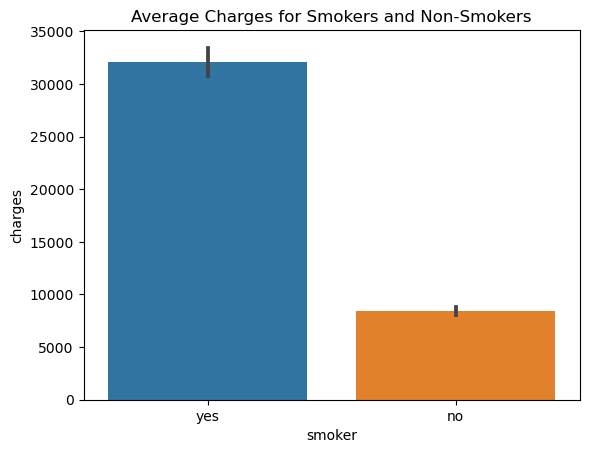

In [10]:
# Visual showing differences in average charges between groups
ax = sns.barplot(data= df, x= 'smoker', y='charges')
ax.set_title('Average Charges for Smokers and Non-Smokers');

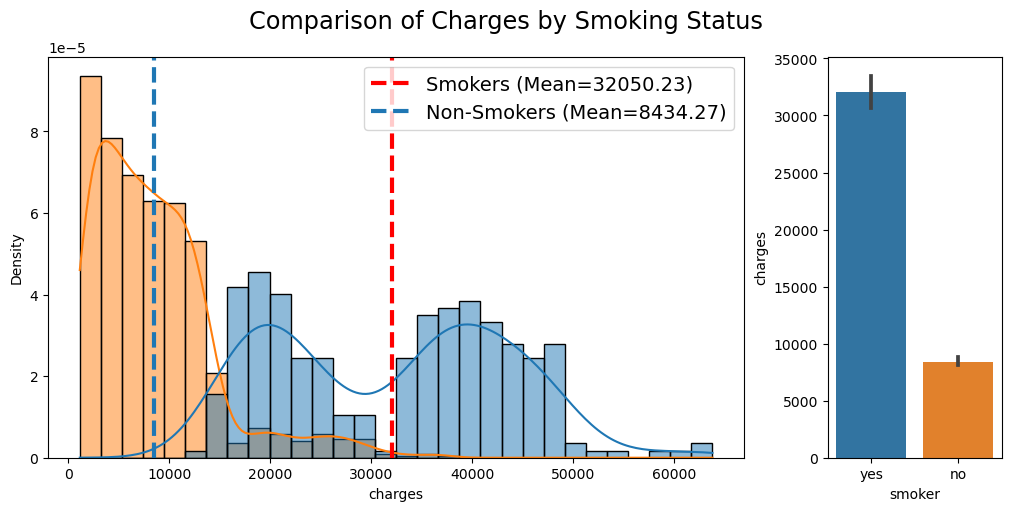

In [13]:
# Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax)

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, color='red', 
           label=f"Smokers (Mean={np.mean(smoker_charges):.2f})")

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"Non-Smokers (Mean={np.mean(non_smoker_charges):.2f})")

ax.legend(prop={"size":14}, loc='upper right')

# Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,)
fig.suptitle('Comparison of Charges by Smoking Status', fontsize='xx-large');

# Hypothesis Test 2: Are men more likely to smoke than women?

**State Hypotheses:**
- Null Hypothesis: There is no difference between men and women smoking.
- Alternate Hypothesis: Men are more likely to smoke than women.
- Alpha = 0.05

**Test Type:**
  Chi-squared is ideal because we are comparing two categorical variables.

**Test Assumptions:**
  - The outcomes are independent (smoking status does not depend on gender)
  - There are two categorical variables
    - Smoking status
    - Gender
  - Assumptions for the test are true.

### Chi-Squared Test

In [14]:
# Create contingency table with pd.crosstab()
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [17]:
# Run test
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result 

display(result)
print(f'P-value: {p}')

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

P-value: 0.006548143503580696


### Analysis

The p-value is less than 0.05, so we reject the null hypothesis that there is no difference between men and women smoking.

One group smokes more than the other.

### Visual

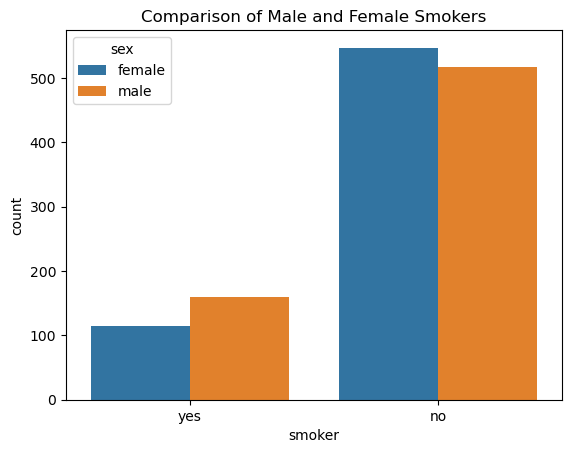

In [19]:
# Visualize counts of male and female smokers
ax = sns.countplot(data= df, x= 'smoker', hue= 'sex')
ax.set_title('Comparison of Male and Female Smokers');

# Note - we don't use the other graph from earlier because we are working with categorical data

# Hypothesis 3: Do different regions have different charges on average?

**State Hypotheses:**
- Null Hypothesis: There are no differences in average charges by regions.
- Alternate Hypothesis: There are differences in average charges by region.
- Alpha = 0.05

**Select Test:**
- Because we are comparing average charges for multiple groups, one-way ANOVA should be used.

**Test Assumptions:**
- Assumptions of one-way ANOVA test:
  - No significant outliers
  - Normality
  - Equal variance

In [20]:
# Create groups
groups = {}

# Loop through all unique categories
for i in df['region'].unique():
    # Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # Save i into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [21]:
# Running normal test on each group and confirming there are >20 in each group
norm_results = {}

for i, data in groups.items():
    stat, p = stats.normaltest(data)
    # Save p-value, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}

# Convert to dataframe and use .T to transpose/flip rows w/ cols
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [23]:
# Check sig and add sig as a col to df
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


The groups are not normally distributed, but since the sample size is larger than 15, we can continue as normal according to the Central Limit Theorem.

In [24]:
# Test for equal variance by unpacking groups
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

Because we fail the assumption of equal variance with this data, I will substitute a Kruskal-Wallis test instead.

Because the equal variance assumption failed, we will use the Kruskal-Wallis test instead.


### Kruskal-Wallis Test

In [25]:
# Execute test
result = stats.kruskal(*groups)
result

c:\Users\Foreground\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


KruskalResult(statistic=3.0, pvalue=0.3916251762710877)

### Analysis:
- The p-value is greater than 0.05, which means we fail to reject the null hypothesis of there being no differences in average charges per region.
- There is not enough evidence to state that there is a significant difference per region.

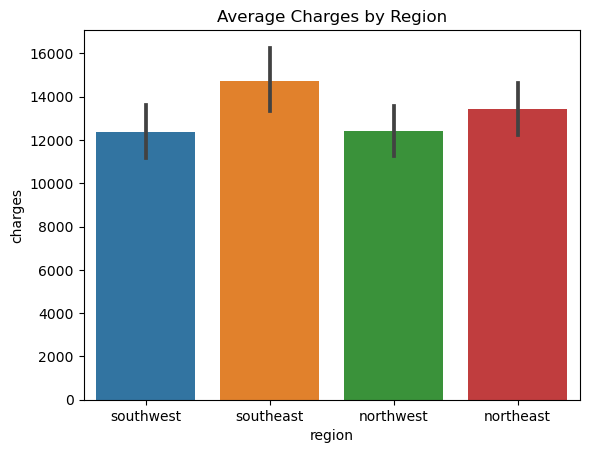

In [26]:
# Visualize average charges by region
ax = sns.barplot(data= df, x='region', y='charges')
ax.set_title('Average Charges by Region');